<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

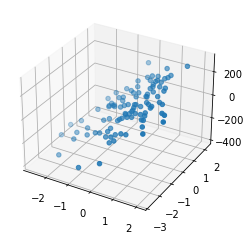

In [ ]:
x,y = make_regression(n_samples=100,n_features=2,noise=10)
fig = plt.figure().gca(projection='3d')
fig.scatter(x[:,0], x[:,1], y)
plt.show()

[]

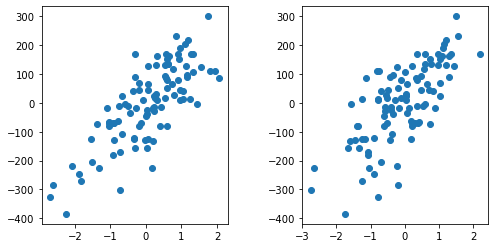

In [ ]:
fig = plt.figure(figsize=(8, 4))  #dimension de la figure en inch
fig.subplots_adjust(hspace=0.4, wspace=0.4) #padding entre les graphes

ax1 = plt.subplot(1,2,1) #ajoute un graphique à la figure (rows,cols,index)
ax1.scatter(x[:, 0], y)

ax2 = plt.subplot(1,2,2)
ax2.scatter(x[:, 1], y)

plt.plot()


In [ ]:
y = y.reshape(y.shape[0],1)

In [ ]:
#création de la matrice X
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
X[:10]

(100, 3)


array([[-0.02258224, -1.44579544,  1.        ],
       [-0.8870028 ,  0.38871265,  1.        ],
       [-0.31947586,  2.1942451 ,  1.        ],
       [ 1.74177949,  1.51077346,  1.        ],
       [-0.73644996, -1.08045358,  1.        ],
       [ 0.07185633,  0.64065393,  1.        ],
       [ 1.18447188,  1.21857608,  1.        ],
       [ 1.14677687, -0.42036807,  1.        ],
       [-0.37202396,  0.84268754,  1.        ],
       [-1.3284957 , -1.04581023,  1.        ]])

In [ ]:
#initialisation de théta
theta = np.random.randn(3,1)
theta

array([[-0.96197152],
       [-0.74462342],
       [ 1.36008588]])

<IPython.core.display.Javascript object>


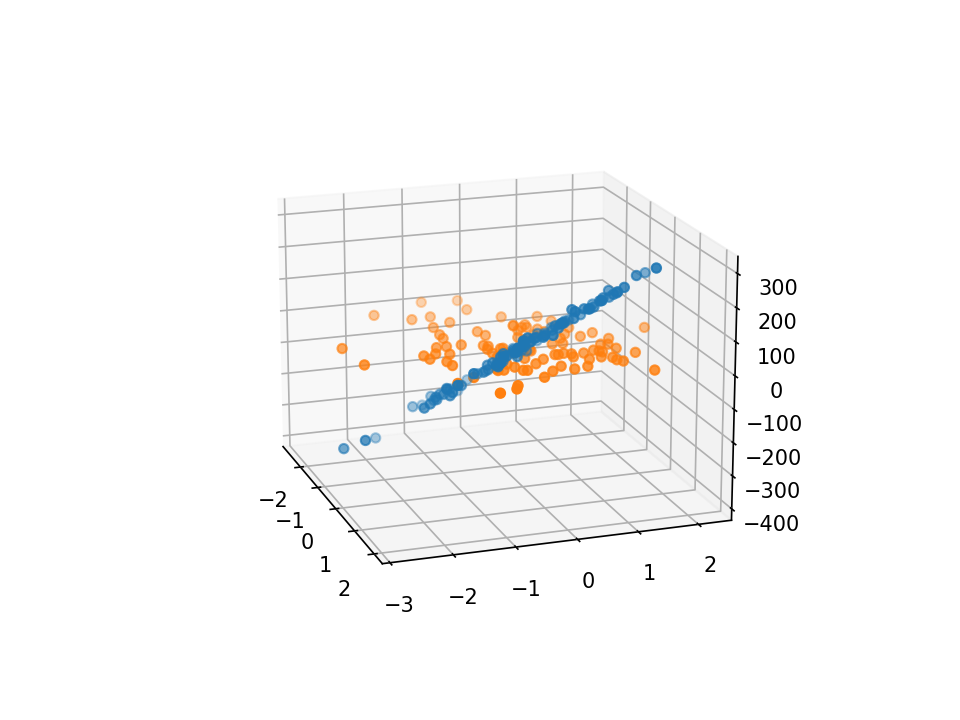

In [ ]:
%matplotlib notebook
prediction = model(X,theta)
fig = plt.figure().gca(projection='3d')

fig.scatter(x[:,0], x[:,1], y)
fig.scatter(x[:,0],x[:,1],prediction)
plt.show()

In [ ]:
#c'est une regression linéaire, de la forme Y = F*theta
def model(X,theta):
    return X.dot(theta)

In [ ]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [ ]:
cost_function(X,y,theta)

9266.003905385673

In [ ]:
def grad(X,y,theta):
    m=len(y)
    return 1/m*X.T.dot(model(X,theta)-y)

In [ ]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

In [ ]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate=0.001,n_iterations=1000)

In [ ]:
theta_final

array([[63.1210591 ],
       [56.91315589],
       [-0.24509692]])

<IPython.core.display.Javascript object>


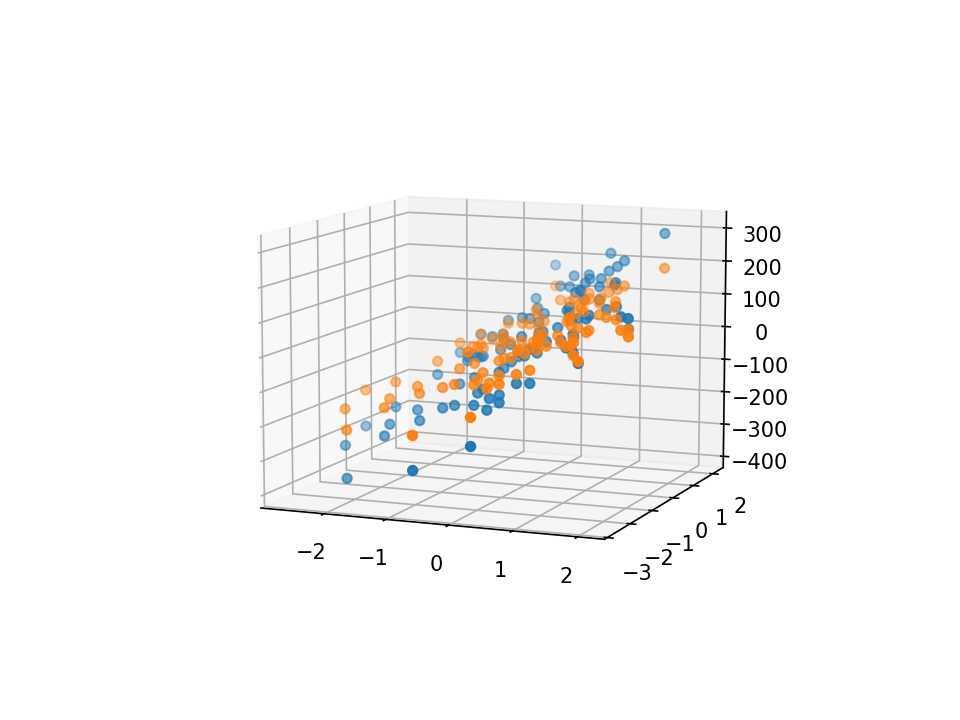

In [ ]:
%matplotlib notebook
prediction = model(X,theta_final)
fig = plt.figure().gca(projection='3d')

fig.scatter(x[:,0], x[:,1], y)
fig.scatter(x[:,0],x[:,1],prediction)
plt.show()